In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# New Section

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

In [6]:
url = 'https://raw.githubusercontent.com/adgnvtefc/Hackalytics2023/main/framingham.csv?token=GHSAT0AAAAAAB5TL6325I3AKMKKBDRVS4DOY7ITZ7A'
df = pd.read_csv(url)


Drop empty rows

In [7]:
df = df.dropna(how='any',axis=0) 
df = df[np.isfinite(df).all(1)]


In [8]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


Sum expected to develop heart disease and not

In [9]:
sumExpected = (df['TenYearCHD'] == 1).sum()
sumNotExpected = (df['TenYearCHD'] == 0).sum()
print(sumExpected)
print(sumNotExpected)

557
3101


Check for correlation between independent vars and TenYearCHD

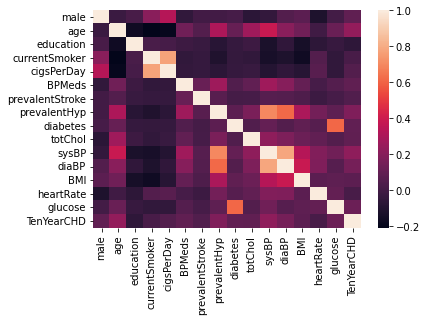

In [10]:
dfCorrelation = df.corr()
sns.heatmap(dfCorrelation)

Since we want variables that can be tested at home, drop everyting that cant be easily measured at home. Get list of current labels.

In [11]:
labelList = df.columns
print(labelList)

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')


Drop totChol and glucose.

In [12]:
df = df.drop('education', axis=1)
df.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


Split data into testing and training sets

In [13]:
y = df['TenYearCHD']
x = df.drop('TenYearCHD', axis = 1)
x = MinMaxScaler().fit_transform(x)

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=29)

In [15]:
print(len(x_train))
print(len(x_test))

2926
732


Create a logistic regression

In [16]:
normalized_df_reg = LogisticRegression().fit(x_train, y_train)
y_pred = normalized_df_reg.predict(x_test)
score = accuracy_score(y_test,y_pred)
print('Accuracy :',score)


#data = [[0,45,2,1,20,0,0,313,100,71,21.68,79,78]]
#result = normalized_df_reg.predict(data)
#print(result)

Accuracy : 0.842896174863388


In [17]:
print(classification_report(y_train, normalized_df_reg.predict(x_train)))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92      2489
           1       0.77      0.04      0.07       437

    accuracy                           0.85      2926
   macro avg       0.81      0.52      0.50      2926
weighted avg       0.84      0.85      0.79      2926



In [18]:
weights = {0:15 , 1:85}
logreg_w = LogisticRegression(class_weight = weights, max_iter = 1000) 
logreg_w.fit(x_train, y_train)
y_pred_w = logreg_w.predict(x_test) 

In [19]:
score = accuracy_score(y_test, y_pred)
print('Accuracy :', score)
print('ROC AUC Score :', roc_auc_score(y_test, y_pred_w))
print(classification_report(y_train, logreg_w.predict(x_train)))

Accuracy : 0.842896174863388
ROC AUC Score : 0.7115196078431373
              precision    recall  f1-score   support

           0       0.92      0.67      0.78      2489
           1       0.27      0.68      0.39       437

    accuracy                           0.67      2926
   macro avg       0.60      0.68      0.58      2926
weighted avg       0.83      0.67      0.72      2926



In [22]:
import pickle
filename = 'finalized_model.sav'
pickle.dump(logreg_w, open(filename, 'wb'))
  
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
y_pred = loaded_model.predict(x_test)
result = accuracy_score(y_test, y_pred)
print(result)

0.6912568306010929


In [21]:
import joblib
joblib.dump(logreg_w, filename)


loaded_model = joblib.load(filename)
y_pred = loaded_model.predict(x_test)
result = accuracy_score(y_test, y_pred)
print(result)

0.6912568306010929
